In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import random
%matplotlib inline

In [2]:
def emax(n, w, d):
    e_max = 0
    i = 1
    for i in range(n):
            e_max += ((d*w[i])**(n - i + 1))/((n - i + 1)*(n - i + 2)*d*w[2])
    return e_max

In [3]:
def min_func(A, m, d, md, w):
    
    #res = res_min_poss(A, m, d, md, w)
    res = res_min_ness(A, m, d, md, w)
    #print('tut1')
    f1 = (w[0]**2) * (m[0]**2 + 1 + (1/3)*(d[0]**2))
    f2 = (w[1]**2) * (m[1]**2 + 1 + (1/3)*(d[1]**2))
    f = (1/12)*(f1 + f2)
    #print('tut1 - ' + str(f))
    return f if res else None

In [4]:
def res_min_poss(A, m, d, md, w):
    #print('tut2')
    res1 = (m[0] + 1 + d[0]*(1 - A))*w[0]
    res2 = (m[1] + 1 + d[1]*(1 - A))*w[1]
    res = (1/2)*(res1 + res2)
    #print('tut2 - ' + str(res))
    res = res >= md
    #print('tut2 - ' + str(res))
    return res

In [5]:
def res_min_ness(A, m, d, md, w):

    res1 = (m[0] + 1 - d[0]*A)*w[0]
    res2 = (m[1] + 1 - d[1]*A)*w[1]
    res = (1/2)*(res1 + res2)
    
    res = res >= md
    return res

In [6]:
def Tm(initialTemperature, i):
    T = initialTemperature / 2
    return T

In [7]:
def takestate(state):
    ub = 1.0
    lb = 0.0
    state_new = np.random.uniform(0, 1, (1, 1)) * (ub - lb) + lb
    state_new = state_new[0]
    state_new = [state_new[0],1 - state_new[0]]
    return state_new

In [8]:
m = [0.3, 2.8]
d = [3.5, 1.5]
#md = 0.9
A = 0.65
n = 2
md = 0

ep = 10000000

rez = []
rez5 = []

In [9]:
def initstate():
    ub = 1.0
    lb = 0.0
    E_can = None
    while E_can is None:
        init_r = np.random.uniform(0, 1, (1, 1)) * (ub - lb) + lb
        init_r = init_r[0]
        init_r = [init_r[0],1 - init_r[0]]
        E_can = min_func(A, m, d, md, init_r)
    return init_r, E_can

In [ ]:
for t in range(15):
    T = 1000000
    P = 0
    md = round(md + 0.1, 3)
    r_new, E_curr = initstate()
    for e in range(ep):
        r_new = takestate(r_new)
        E_can = min_func(A, m, d, md, r_new)
        if E_can != None:
            if E_can <= E_curr: 
                E_curr = E_can
                R_max = r_new
            elif E_can > E_curr:
                dE = E_can - E_curr
                if T > 1:
                    P = math.exp(-dE/T)
                    Rand = random.random()
                    if P > Rand:
                        T = Tm(T, e)
                        E_curr = E_can
                        R_max = r_new
    rez.append(E_curr)
    print('уровень = '+ str(md) + ' риск = ' + str(E_curr) + ' W = ' + str(R_max[0]) +' '+ str(R_max[1]) +'\n')
    
   

In [ ]:
#y = np.arange(20)
plt.plot(rez)

In [ ]:
Rand = random.random()

In [10]:
for t in range(14):
    T = 10000000000
    P = 0
    md = round(md + 0.1, 3)
    r_new, E_curr = initstate()
    for e in range(ep):
        r_new = takestate(r_new)
        E_can = min_func(A, m, d, md, r_new)
        if E_can != None:
            if E_can <= E_curr: 
                E_curr = E_can
                R_max = r_new
            elif E_can > E_curr:
                dE = E_can - E_curr
                if T > 1:
                    P = math.exp(-dE/T)
                    Rand = random.random()
                    if P > Rand:
                        T = Tm(T, e)
                        E_curr = E_can
                        R_max = r_new
    rez.append(R_max)
    rez5.append(E_curr)
    print('уровень = '+ str(md) + ' риск = ' + str(E_curr) + ' W = ' + str(R_max[0]) +' '+ str(R_max[1]) +'\n')
    f = open("test.txt", "a")
    f.write('уровень = '+ str(md) + ' риск = ' + str(E_curr) + ' W = ' + str(R_max[0]) +' '+ str(R_max[1]) +'\n')
    f.close()
    

уровень = 0.1 риск = 0.28004214645895364 W = 0.6495822136260913 0.35041778637390875

уровень = 0.2 риск = 0.280202720834708 W = 0.6381578161274851 0.3618421838725149

уровень = 0.3 риск = 0.2850902117154327 W = 0.5855261399383798 0.41447386006162024

уровень = 0.4 риск = 0.29679361949194205 W = 0.5328946436677914 0.4671053563322086

уровень = 0.5 риск = 0.315312969093375 W = 0.4802630997002063 0.5197369002997937

уровень = 0.6 риск = 0.34064826515790425 W = 0.42763153347409966 0.5723684665259003

уровень = 0.7 риск = 0.37279949849625776 W = 0.3749999713900609 0.6250000286099391

уровень = 0.8 риск = 0.4117666702864252 W = 0.3223684099862564 0.6776315900137436

уровень = 0.9 риск = 0.4575499545200309 W = 0.26973666281916986 0.7302633371808301

уровень = 1.0 риск = 0.5101489533420468 W = 0.217105171586637 0.782894828413363

уровень = 1.1 риск = 0.5695638718427398 W = 0.16447368116664296 0.835526318833357

уровень = 1.2 риск = 0.6357950632294309 W = 0.11184192437425722 0.8881580756257428


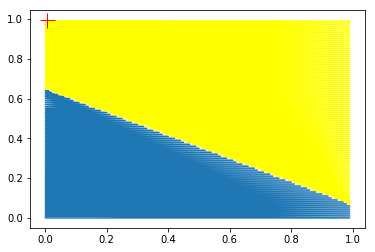

In [11]:
    xx0 = []
    yy0 = []
    xx1 = []
    yy1 = []


    r = np.arange(0, 1.0, 0.01)
    for y in r:
        for x in r:
            r1 = res_min_poss(A, m, d, md, [x, y])
            if r1: #and r2:
                xx0.append(x)
                yy0.append(y)
            else:
                xx1.append(x)
                yy1.append(y)


    plt.plot(xx1, yy1)
    plt.plot(xx0, yy0, 'yellow')
    plt.plot(R_max[0], R_max[1], 'r+', markersize=15)
    plt.show()
    
    #r = R_max.tolist()
    #print(R_max)
    #
    
    #f = open("test.txt", "a")
    #f.write('уровень = '+ str(md) + ' риск = ' + str(E_curr) + ' W = ' + str(R_max[1]) +' '+ str(R_max[2]) +'\n')
    #f.close()

In [12]:
plt.scatter(rez1[:,0], rez1[:,1])

NameError: name 'rez1' is not defined